In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sales_df = pd.read_csv('D:/python/synthetic_weather_sales_data.csv')

In [4]:
print(sales_df.head())

        Day  Temperature Sunny  Sales
0  1/1/2020            7    No     33
1  1/2/2020            4    No     30
2  1/3/2020            7    No     41
3  1/4/2020            7    No     65
4  1/5/2020           12    No     25


In [7]:
print(sales_df.info())
print(sales_df.describe())
#Get descriptive statisctics for categorical column
print(sales_df.describe(include = 'object'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day          720 non-null    datetime64[ns]
 1   Temperature  1825 non-null   int64         
 2   Sunny        1825 non-null   object        
 3   Sales        1825 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 57.2+ KB
None
                       Day  Temperature        Sales
count                  720  1825.000000  1825.000000
mean   2022-06-22 03:12:00    14.865205    46.894795
min    2020-01-01 00:00:00    -3.000000     0.000000
25%    2021-03-27 00:00:00     9.000000    31.000000
50%    2022-06-21 12:00:00    15.000000    43.000000
75%    2023-09-16 18:00:00    21.000000    61.000000
max    2024-12-12 00:00:00    32.000000   123.000000
std                    NaN     7.448906    22.340342
       Sunny
count   1825
unique     2
top      

In [9]:
sales_df['Day'] = pd.to_datetime(sales_df['Day'], dayfirst=True, errors='coerce')

In [10]:
print(sales_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day          720 non-null    datetime64[ns]
 1   Temperature  1825 non-null   int64         
 2   Sunny        1825 non-null   object        
 3   Sales        1825 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 57.2+ KB
None


In [28]:
# Mean, median, and standard deviation for Temperature and Sales
mean_temp = sales_df['Temperature'].mean()
median_temp = sales_df['Temperature'].median()
std_temp = sales_df['Temperature'].std()
mean_sales = sales_df['Sales'].mean()
median_sales = sales_df['Sales'].median()
std_sales = sales_df['Sales'].std()
print(f" Mean of Temperature: {mean_temp:.2f}")
print(f"Median of Temperature: {median_temp:.2f}")
print(f"Standard Deviation of Temperatures:{std_temp:.2f}")
print(f" Mean of Sales: {mean_sales:.2f}")
print(f" Median of Sales: {median_sales:.2f}")
print(f"Standard Deviation of Sales: {std_sales:.2f}")

 Mean of Temperature: 14.87
Median of Temperature: 15.00
Standard Deviation of Temperatures:7.45
 Mean of Sales: 46.89
 Median of Sales: 43.00
Standard Deviation of Sales: 22.34


In [12]:
#Feature engineering for extracting useful information from day column
sales_df['Year'] = sales_df['Day'].dt.year
sales_df['Month'] = sales_df['Day'].dt.month
sales_df['DayOfWeek'] = sales_df['Day'].dt.day_name()
sales_df['DayOfYear'] = sales_df['Day'].dt.dayofyear # Useful for seasonality across years
sales_df['WeekOfYear'] = sales_df['Day'].dt.isocalendar().week.astype('Int64') # Week of the year
sales_df['Quarter'] = sales_df['Day'].dt.quarter

print("\nNew date-based features added:")
print(sales_df.head())


New date-based features added:
         Day  Temperature Sunny  Sales    Year  Month  DayOfWeek  DayOfYear  \
0 2020-01-01            7    No     33  2020.0    1.0  Wednesday        1.0   
1 2020-02-01            4    No     30  2020.0    2.0   Saturday       32.0   
2 2020-03-01            7    No     41  2020.0    3.0     Sunday       61.0   
3 2020-04-01            7    No     65  2020.0    4.0  Wednesday       92.0   
4 2020-05-01           12    No     25  2020.0    5.0     Friday      122.0   

   WeekOfYear  Quarter  
0           1      1.0  
1           5      1.0  
2           9      1.0  
3          14      2.0  
4          18      2.0  



--- 3. Univariate Analysis ---


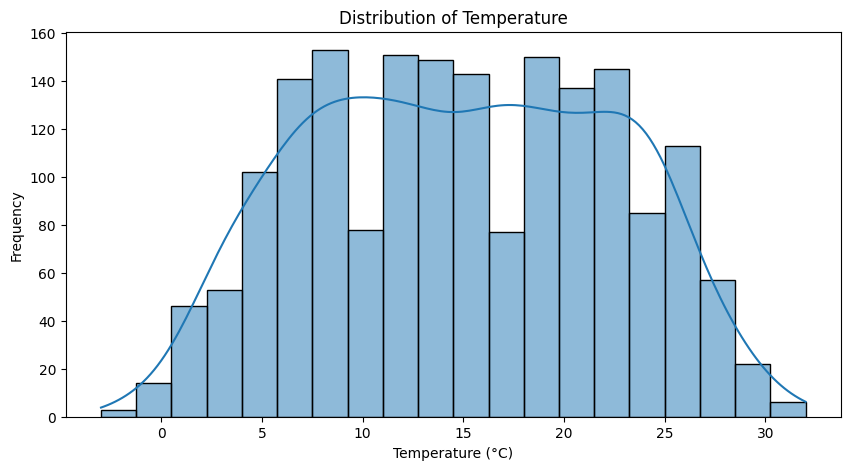

In [13]:
#Univariate Analysis (Individual Column Distributions)
print("\n--- 3. Univariate Analysis ---")

# Distribution of Temperature
plt.figure(figsize=(10, 5))
sns.histplot(sales_df['Temperature'], bins=20, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


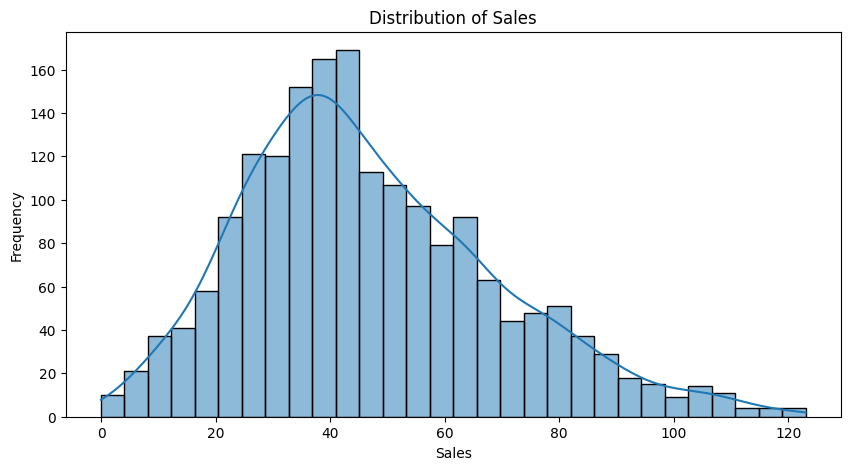

In [14]:
# Distribution of Sales
plt.figure(figsize=(10, 5))
sns.histplot(sales_df['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


Value Counts for 'Sunny' column:
Sunny
No     938
Yes    887
Name: count, dtype: int64


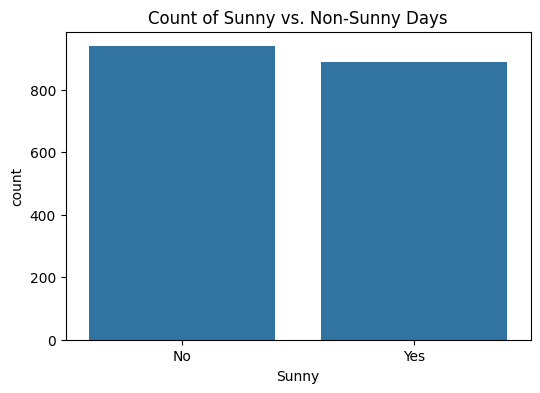

In [15]:
# Value counts for 'Sunny'
print("\nValue Counts for 'Sunny' column:")
print(sales_df['Sunny'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x='Sunny', data=sales_df)
plt.title('Count of Sunny vs. Non-Sunny Days')
plt.show()

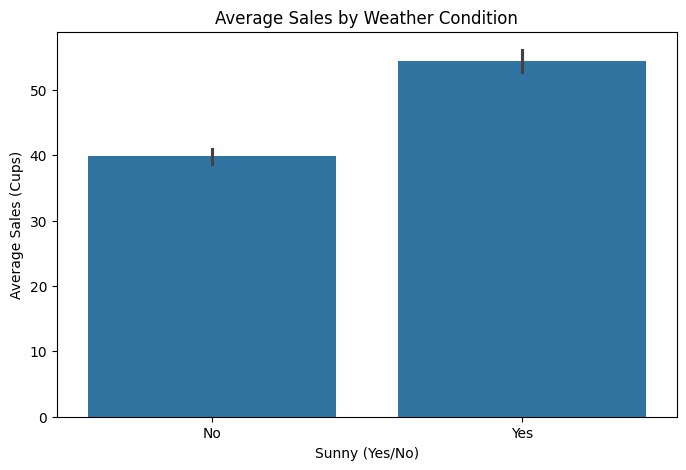

In [32]:
#Average sales on sunny vs non-sunny days
plt.figure(figsize=(8, 5))
sns.barplot(x='Sunny', y='Sales', data=sales_df)
plt.title('Average Sales by Weather Condition')
plt.xlabel('Sunny (Yes/No)')
plt.ylabel('Average Sales (Cups)')
plt.show()


Value Counts for 'DayOfWeek' column:
DayOfWeek
Friday       104
Saturday     103
Wednesday    103
Sunday       103
Thursday     103
Monday       102
Tuesday      102
Name: count, dtype: int64


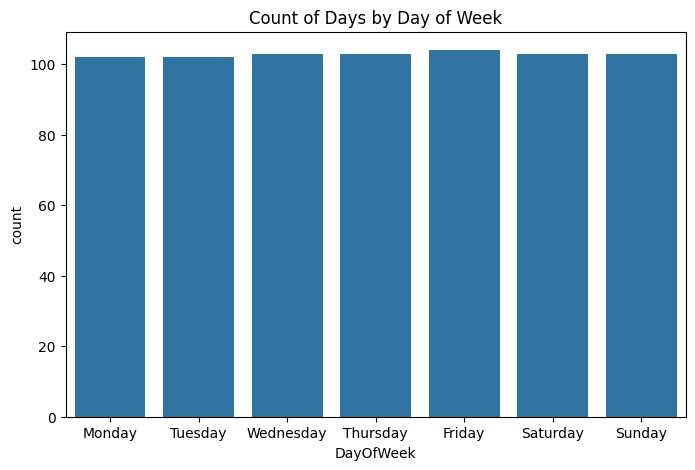

In [16]:
# Value counts for 'DayOfWeek'
print("\nValue Counts for 'DayOfWeek' column:")
print(sales_df['DayOfWeek'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(x='DayOfWeek', data=sales_df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Count of Days by Day of Week')
plt.show()

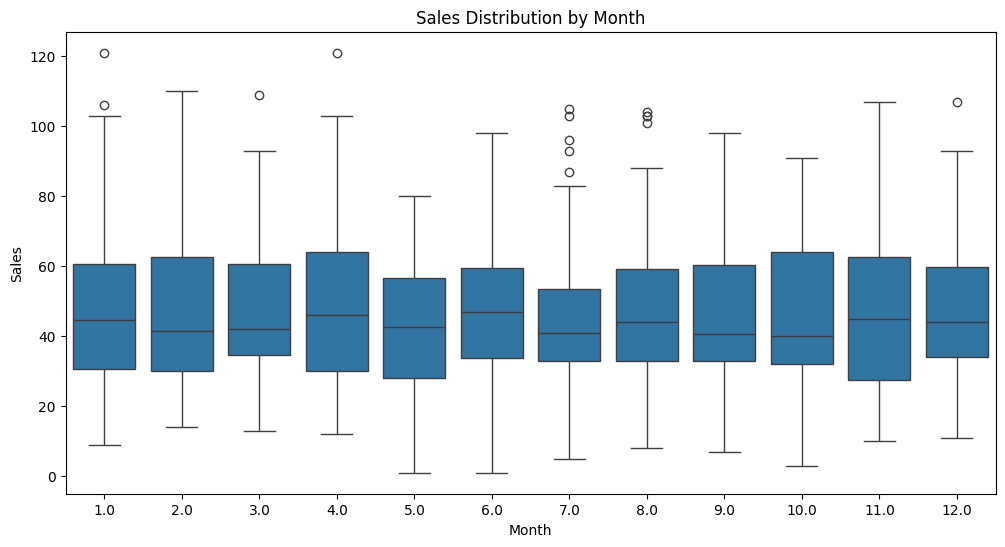

In [17]:
# Distribution of Sales by Month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Sales', data=sales_df)
plt.title('Sales Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

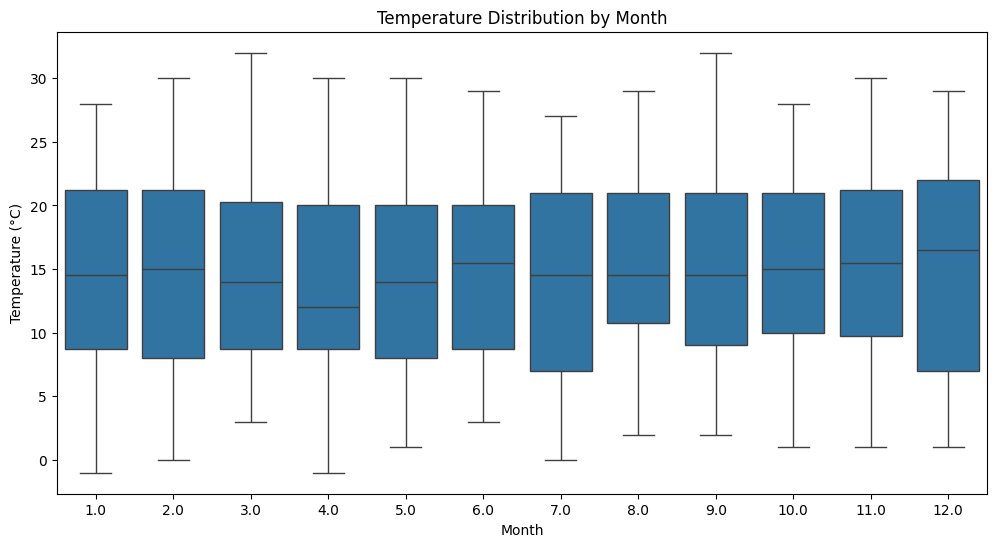

In [18]:
# Distribution of Temperature by Month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Temperature', data=sales_df)
plt.title('Temperature Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

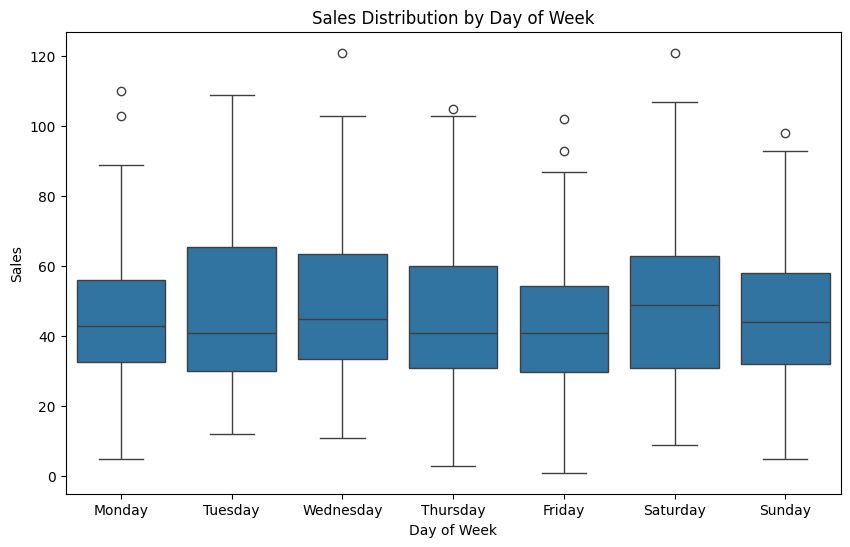

In [19]:
# Distribution of Sales by Day of Week
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='Sales', data=sales_df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Sales Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.show()

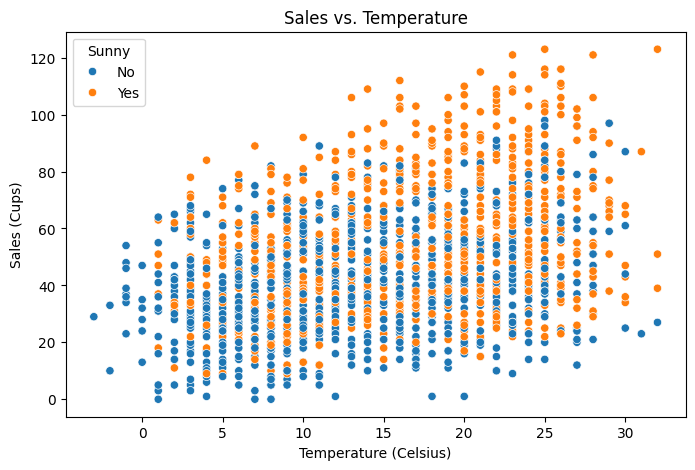

In [31]:
#Relationship between temperature and sales

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Temperature', y='Sales', hue='Sunny', data=sales_df)
plt.title('Sales vs. Temperature')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Sales (Cups)')
plt.show()

In [27]:
print("\n--- 4. Bivariate and Multivariate Analysis ---")



--- 4. Bivariate and Multivariate Analysis ---


In [34]:
# Correlation matrix for numerical variables
print("\nCorrelation Matrix (Numerical Columns):")
numerical_cols = ['Temperature', 'Sales', 'Year', 'Month', 'DayOfYear', 'WeekOfYear', 'Quarter']
print(sales_df[numerical_cols].corr())


Correlation Matrix (Numerical Columns):
             Temperature     Sales          Year         Month     DayOfYear  \
Temperature     1.000000  0.364843  1.950581e-02  2.383804e-02  3.025117e-02   
Sales           0.364843  1.000000 -5.714258e-03 -3.012422e-03 -8.498317e-04   
Year            0.019506 -0.005714  1.000000e+00 -3.942354e-15 -5.919320e-15   
Month           0.023838 -0.003012 -3.942354e-15  1.000000e+00  9.994362e-01   
DayOfYear       0.030251 -0.000850 -5.919320e-15  9.994362e-01  1.000000e+00   
WeekOfYear     -0.010229 -0.014892 -9.459121e-03  9.509214e-01  9.503988e-01   
Quarter         0.018922 -0.007732 -4.323396e-15  9.716254e-01  9.711202e-01   

             WeekOfYear       Quarter  
Temperature   -0.010229  1.892161e-02  
Sales         -0.014892 -7.732309e-03  
Year          -0.009459 -4.323396e-15  
Month          0.950921  9.716254e-01  
DayOfYear      0.950399  9.711202e-01  
WeekOfYear     1.000000  9.300064e-01  
Quarter        0.930006  1.000000e+00 

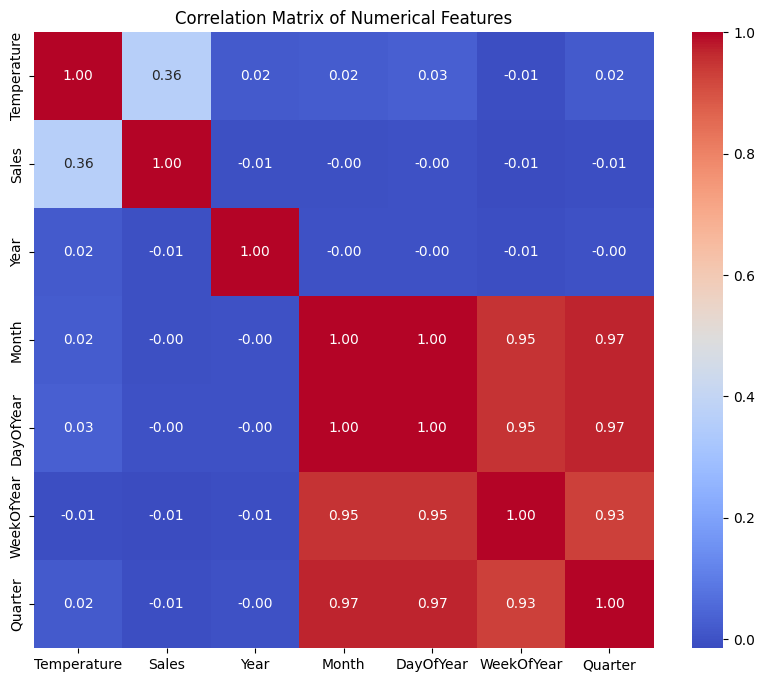

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(sales_df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

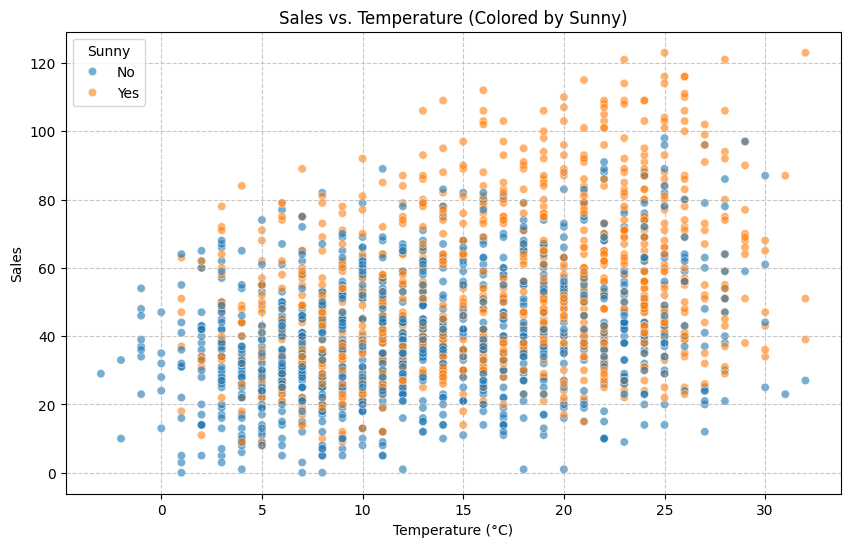

In [36]:
# Scatter plot: Sales vs. Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Sales', hue='Sunny', data=sales_df, alpha=0.6)
plt.title('Sales vs. Temperature (Colored by Sunny)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Sales')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

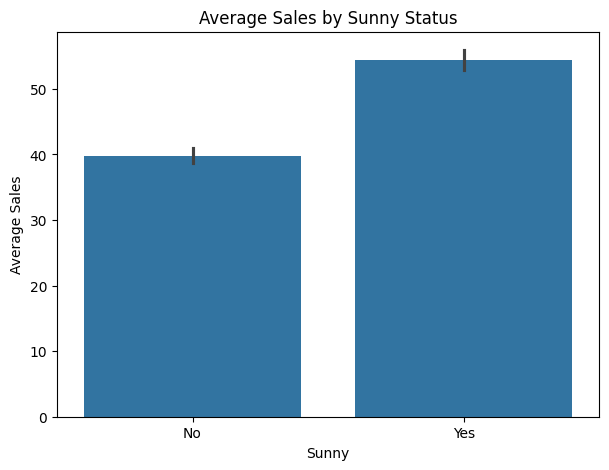

In [37]:
# Bar plot: Average Sales by Sunny
plt.figure(figsize=(7, 5))
sns.barplot(x='Sunny', y='Sales', data=sales_df, estimator=np.mean)
plt.title('Average Sales by Sunny Status')
plt.xlabel('Sunny')
plt.ylabel('Average Sales')
plt.show()


C:\Users\kpk laptops\AppData\Local\Temp\ipykernel_1572\403281962.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(x='Day', y='Sales', data=sales_df.set_index('Day')['Sales'].resample('M').mean().reset_index()) # Monthly average


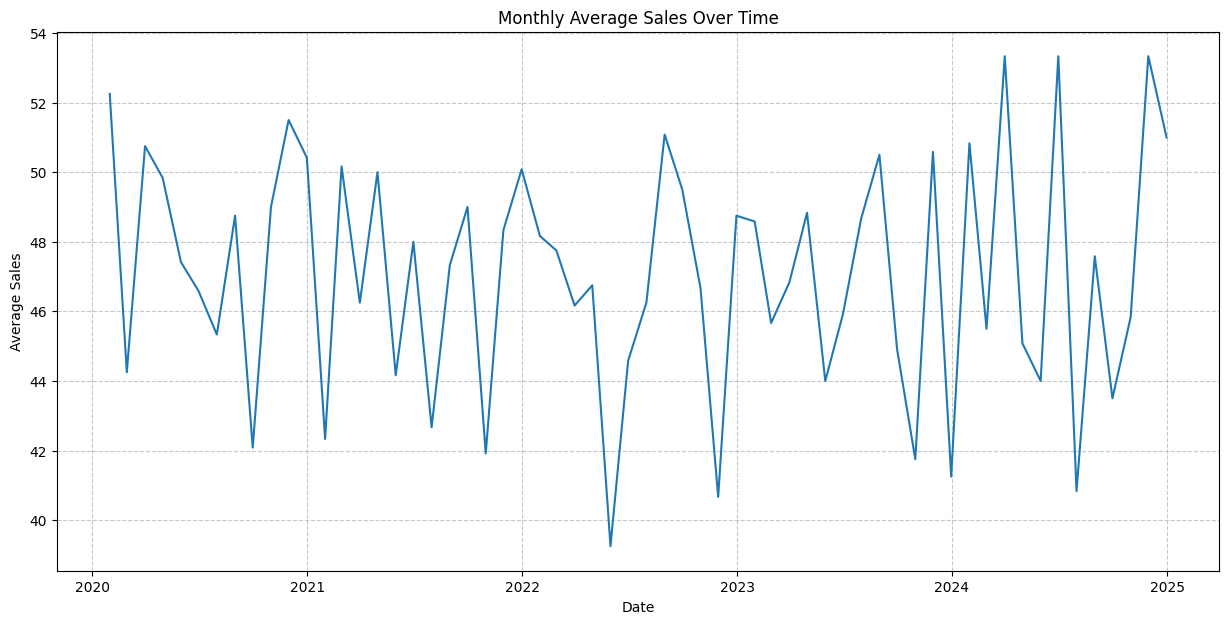

In [40]:

# Line plot: Sales over time (Yearly/Monthly Trends)
plt.figure(figsize=(15, 7))
sns.lineplot(x='Day', y='Sales', data=sales_df.set_index('Day')['Sales'].resample('M').mean().reset_index()) # Monthly average
plt.title('Monthly Average Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


C:\Users\kpk laptops\AppData\Local\Temp\ipykernel_1572\4207505878.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(x='Day', y='Temperature', data=sales_df.set_index('Day')['Temperature'].resample('M').mean().reset_index(), color='orange')


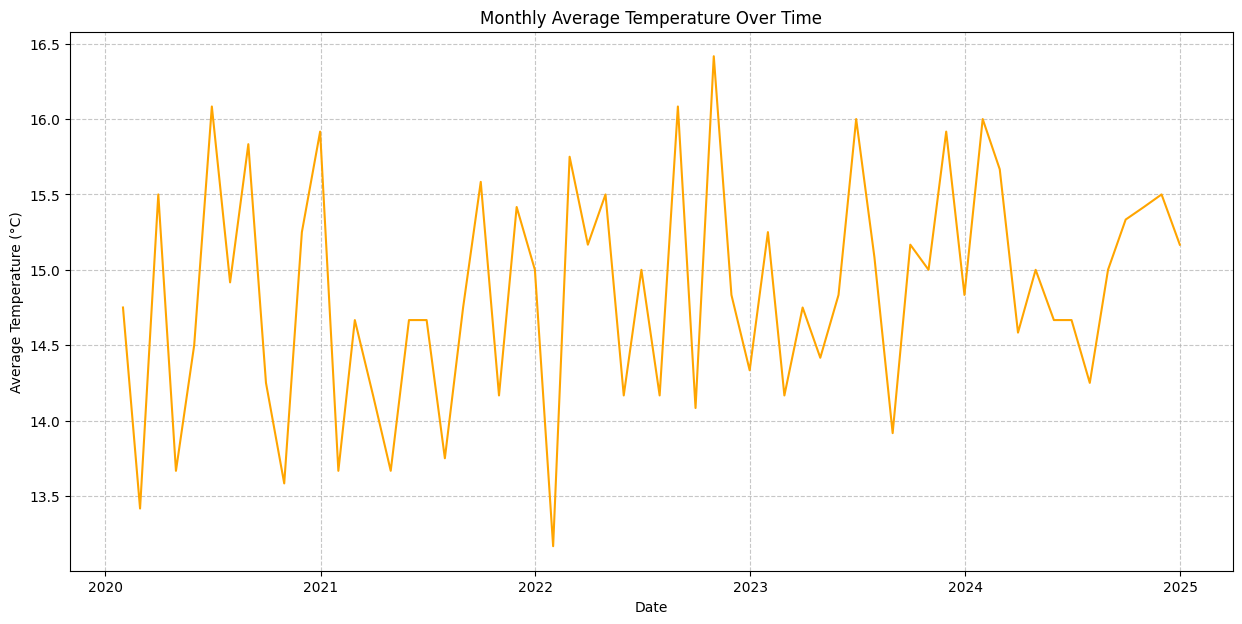

In [41]:
plt.figure(figsize=(15, 7))
sns.lineplot(x='Day', y='Temperature', data=sales_df.set_index('Day')['Temperature'].resample('M').mean().reset_index(), color='orange')
plt.title('Monthly Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


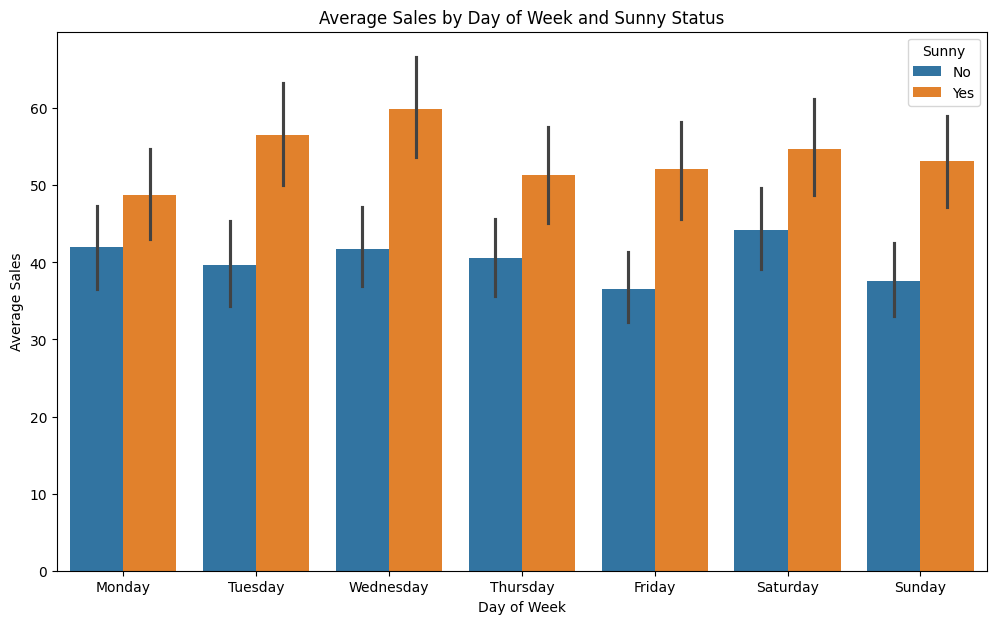

In [42]:
# Grouped bar plot: Average Sales by Day of Week and Sunny
plt.figure(figsize=(12, 7))
sns.barplot(x='DayOfWeek', y='Sales', hue='Sunny', data=sales_df, estimator=np.mean,
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Sales by Day of Week and Sunny Status')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales')
plt.show()